In [1]:
### 포켓 몬스터 프로젝트

In [2]:
## 1-4 포켓몬 데이터 불러오기

In [15]:
# 라이브러리 가져오기

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
print('슝=3')

슝=3


In [16]:
## 데이터셋을 pandas로 불러오기

import os
csv_path = os.getenv("HOME") +"/aiffel/pokemon_eda/data/data/Pokemon.csv"
original_data = pd.read_csv(csv_path)
print('슝=3')

슝=3


In [17]:
# pokemon 변수에 데이터를 저장하고 pandas 데이터로 나타냄

pokemon = original_data.copy()
print(pokemon.shape)
pokemon.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [18]:
# 전설의 포켓몬 데이터셋 생성

legendary = pokemon[pokemon["Legendary"] == True].reset_index(drop=True)
print(legendary.shape)
legendary.head()

(65, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [19]:
# Q. 일반 포켓몬의 데이터셋 생성

# 일반 포켓몬의 데이터셋 생성
ordinary = pokemon[pokemon["Legendary"] == False].reset_index(drop=True)
print(ordinary.shape)
ordinary.head()

(735, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [20]:
# 빈 데이터 확인하기

pokemon.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [21]:
# 데이터의 전체 컬럼 출력

print(len(pokemon.columns))
pokemon.columns

13


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [22]:
# ID Number 컬럼 확인

len(set(pokemon["#"]))

721

In [23]:
# '#' 값을 가지는 포켓몬 확인

pokemon[pokemon["#"] == 6]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


In [24]:
# Name 칼럼 확인

len(set(pokemon["Name"]))

800

In [25]:
## Type 1 & Type 2 : 포켓몬의 속성

In [26]:
# 무작위로 두 마리의 포켓몬 속성 살펴보기

pokemon.loc[[6, 10]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False


In [27]:
# 각 속성의 종류는 몇 가자인지 파악

len(list(set(pokemon["Type 1"]))), len(list(set(pokemon["Type 2"])))

(18, 19)

In [28]:
# Type2가 속성이 한 가지 더 많음으로 차집합을 만들어 나머지 속성 1개 확인하기
# 파이썬 차집합 함수(set difference)

set(pokemon["Type 2"]) - set(pokemon["Type 1"])

{nan}

In [29]:
# 포켓몬들의 모든 Type을 types 변수에 저장

types = list(set(pokemon["Type 1"]))
print(len(types))
print(types)

18
['Ice', 'Poison', 'Normal', 'Ghost', 'Rock', 'Steel', 'Bug', 'Ground', 'Psychic', 'Electric', 'Fire', 'Water', 'Flying', 'Dark', 'Grass', 'Fighting', 'Dragon', 'Fairy']


In [30]:
# 데이터가 비어있는 Nan (결측값)의 개수 확인

pokemon["Type 2"].isna().sum()

386

In [31]:
## Type 1 데이터 분포 plot

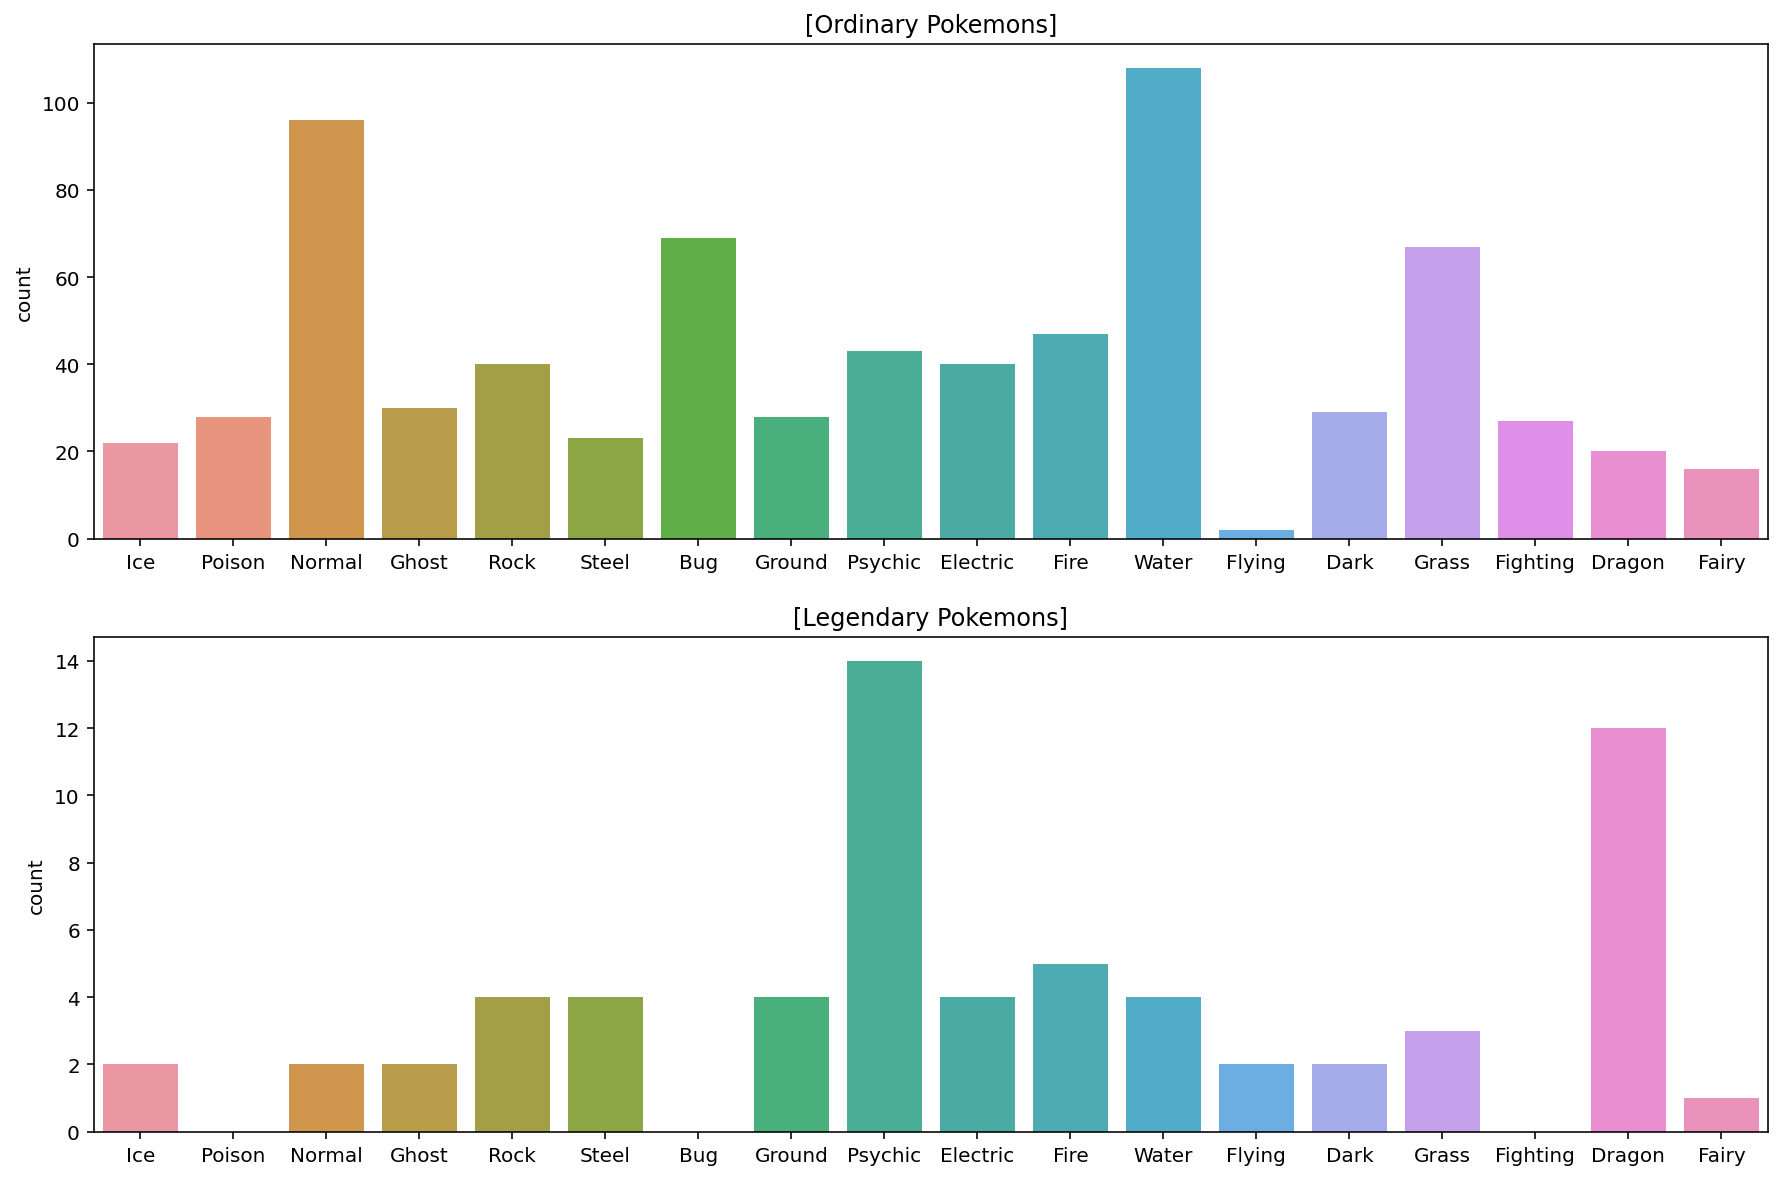

In [32]:
# plt의 subplot을 활용해서 두 개의 그래프를 한 번에 그리면서, 그래프는 sns(seaborn)의 countplot을 활용
# countplot은 데이터의 개수를 표시하는 플롯

plt.figure(figsize=(15, 10))  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 1", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 1", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

In [33]:
# 피벗 테이블(pivot table)로 각 속성에 Legendary 포켓몬들이 몇 퍼센트씩 있는지 확인
# sort_value를 활용해 높은 것부터 낮은 순으로 정렬

In [34]:
# Type1별로 Legendary의 비율을 보여주는 피벗 테이블

pd.pivot_table(pokemon, index="Type 1", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 1,
Flying,0.500000
Dragon,0.375000
Psychic,0.245614
Steel,0.148148
Ground,0.125000
Fire,0.096154
Electric,0.090909
Rock,0.090909
Ice,0.083333


In [35]:
## Type 2 데이터 분포 plot

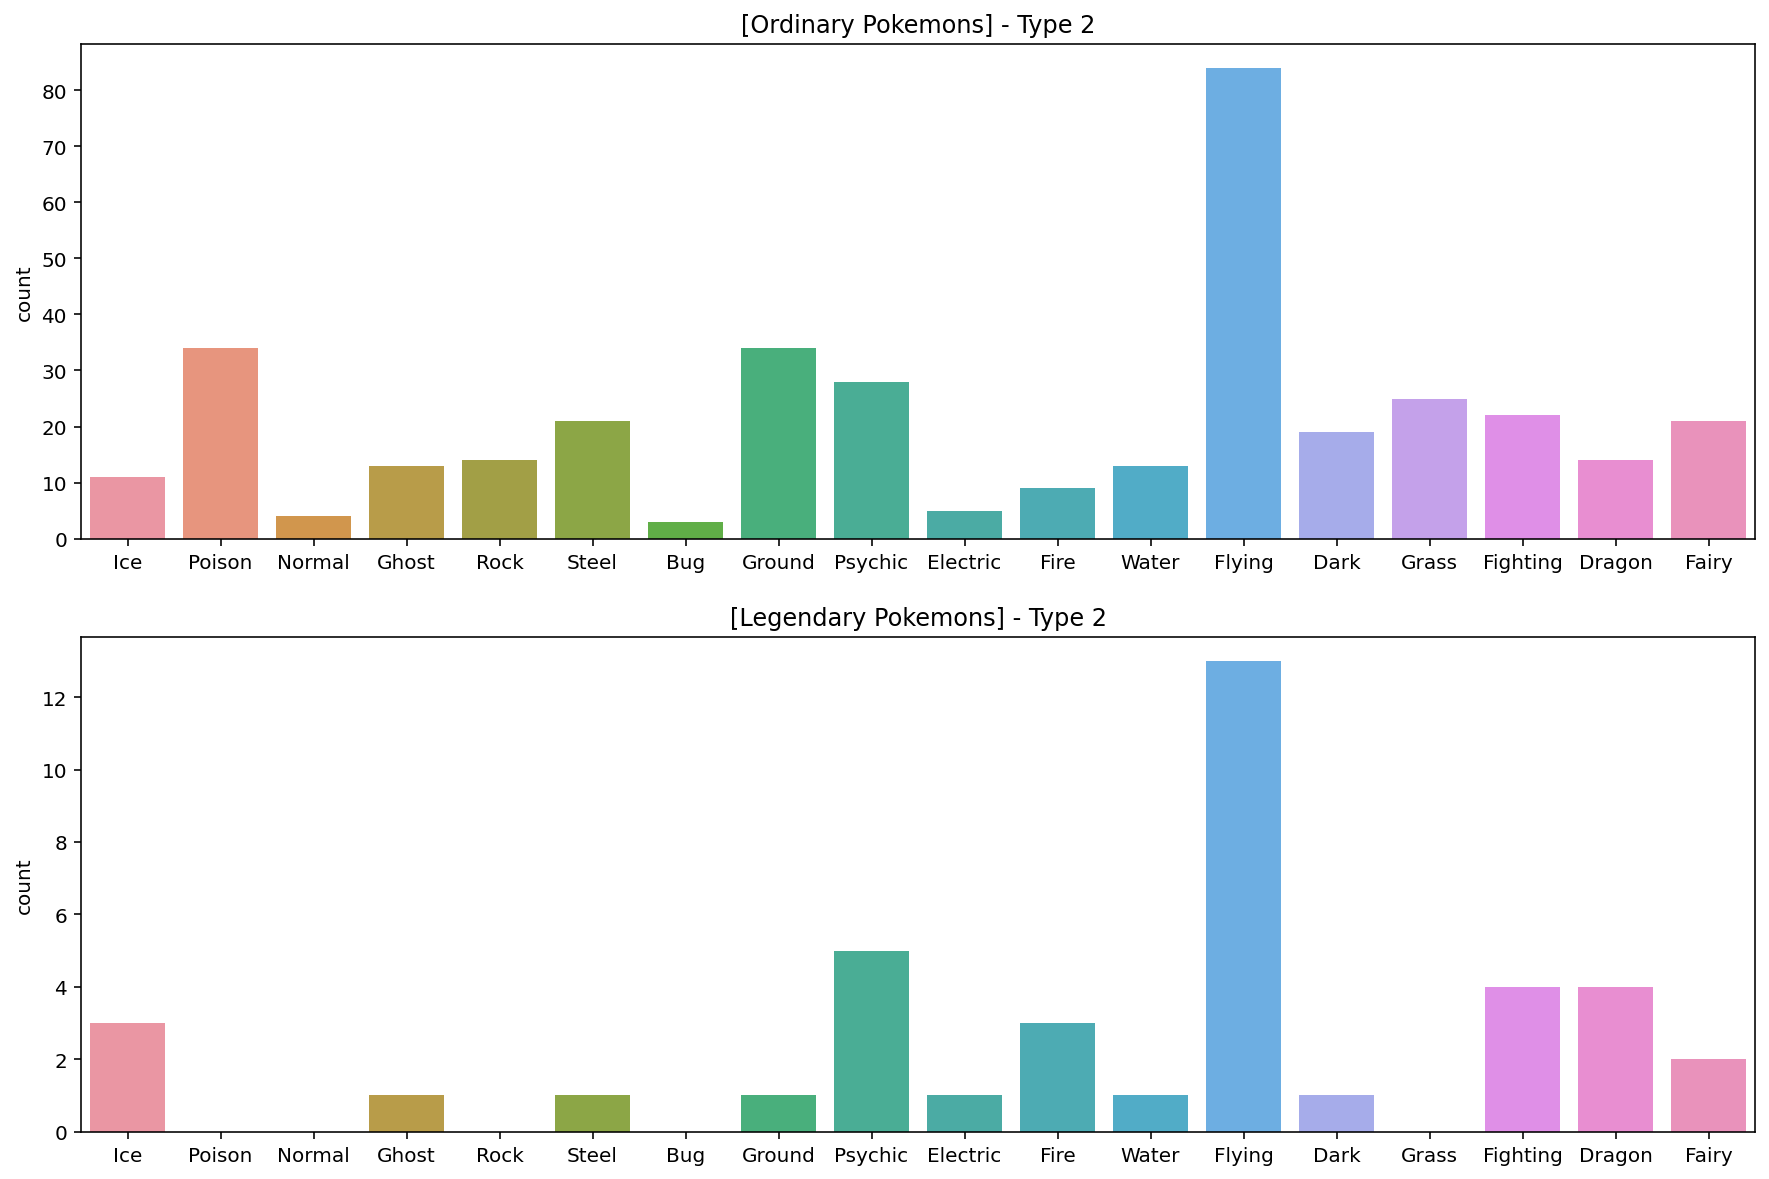

In [36]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
sns.countplot(data=ordinary, x="Type 2", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons] - Type 2")

# 전설의 포켓몬에 대한 Type 2 속성 히스토그램
plt.subplot(2, 1, 2)
sns.countplot(data=legendary, x="Type 2", order=types).set_xlabel('')
plt.title("[Legendary Pokemons] - Type 2")

plt.show()

In [37]:
# SKIP

# Type 2가 'Fire'인 경우의 Legendary 비율 계산을 위한 피벗 테이블
type2_pivot = pd.pivot_table(pokemon, index="Type 2", values="Legendary", aggfunc="mean").fillna(0)

# 결과 출력
print(type2_pivot)


          Legendary
Type 2             
Bug        0.000000
Dark       0.050000
Dragon     0.222222
Electric   0.166667
Fairy      0.086957
Fighting   0.153846
Fire       0.250000
Flying     0.134021
Ghost      0.071429
Grass      0.000000
Ground     0.028571
Ice        0.214286
Normal     0.000000
Poison     0.000000
Psychic    0.151515
Rock       0.000000
Steel      0.045455
Water      0.071429


In [38]:
# SKIP
# Type 2에 대한 Legendary 비율을 계산한 피벗 테이블 
type2_pivot = pd.pivot_table(pokemon, index="Type 2", values="Legendary", aggfunc="mean").fillna(0) * 100

# 결과 출력 (백분율로 출력함)
print(type2_pivot)

          Legendary
Type 2             
Bug        0.000000
Dark       5.000000
Dragon    22.222222
Electric  16.666667
Fairy      8.695652
Fighting  15.384615
Fire      25.000000
Flying    13.402062
Ghost      7.142857
Grass      0.000000
Ground     2.857143
Ice       21.428571
Normal     0.000000
Poison     0.000000
Psychic   15.151515
Rock       0.000000
Steel      4.545455
Water      7.142857


In [39]:
import pandas as pd

# Type 2에 대한 빈도수 계산
type2_counts = pokemon["Type 2"].value_counts()

# 전설의 포켓몬에 대한 Type 2 속성의 빈도수 계산
legendary_type2_counts = legendary["Type 2"].value_counts()

# 일반 포켓몬에 대한 Type 2 속성의 빈도수 계산
ordinary_type2_counts = ordinary["Type 2"].value_counts()

# 데이터프레임 생성
type2_pivot = pd.DataFrame({
    'Total': type2_counts,
    'Ordinary': ordinary_type2_counts,
    'Legendary': legendary_type2_counts
}).fillna(0)  # NaN 값은 0으로 채움

# Legendary 비율 계산
type2_pivot["Legendary Ratio"] = type2_pivot["Legendary"] / type2_pivot["Total"] * 100

# 결과 출력
print(type2_pivot)


          Total  Ordinary  Legendary  Legendary Ratio
Bug           3         3        0.0         0.000000
Dark         20        19        1.0         5.000000
Dragon       18        14        4.0        22.222222
Electric      6         5        1.0        16.666667
Fairy        23        21        2.0         8.695652
Fighting     26        22        4.0        15.384615
Fire         12         9        3.0        25.000000
Flying       97        84       13.0        13.402062
Ghost        14        13        1.0         7.142857
Grass        25        25        0.0         0.000000
Ground       35        34        1.0         2.857143
Ice          14        11        3.0        21.428571
Normal        4         4        0.0         0.000000
Poison       34        34        0.0         0.000000
Psychic      33        28        5.0        15.151515
Rock         14        14        0.0         0.000000
Steel        22        21        1.0         4.545455
Water        14        13   

In [40]:
## 1-8 모든 스탯의 총합
# Total : 모든 스탯의 총합

In [41]:
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
stats

['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

In [42]:
# 첫 번째 포켓몬에 대해서 검증하는 코드

print("#0 pokemon: ", pokemon.loc[0, "Name"])
print("total: ", int(pokemon.loc[0, "Total"]))
print("stats: ", list(pokemon.loc[0, stats]))
print("sum of all stats: ", sum(list(pokemon.loc[0, stats])))

#0 pokemon:  Bulbasaur
total:  318
stats:  [45, 49, 49, 65, 65, 45]
sum of all stats:  318


In [43]:
# pandas의 sum() 함수 사용한다.
# Q. 'pokemon['Total'].values'와 'pokemon[stats].values의 총합'이 같은 포켓몬의 수를 확인한다.

matching_total_count = sum((pokemon['Total'].values == pokemon[stats].values.sum(axis=1)).astype(int))
print("Number of Pokemon with matching total and sum of stats: ", matching_total_count)


Number of Pokemon with matching total and sum of stats:  800


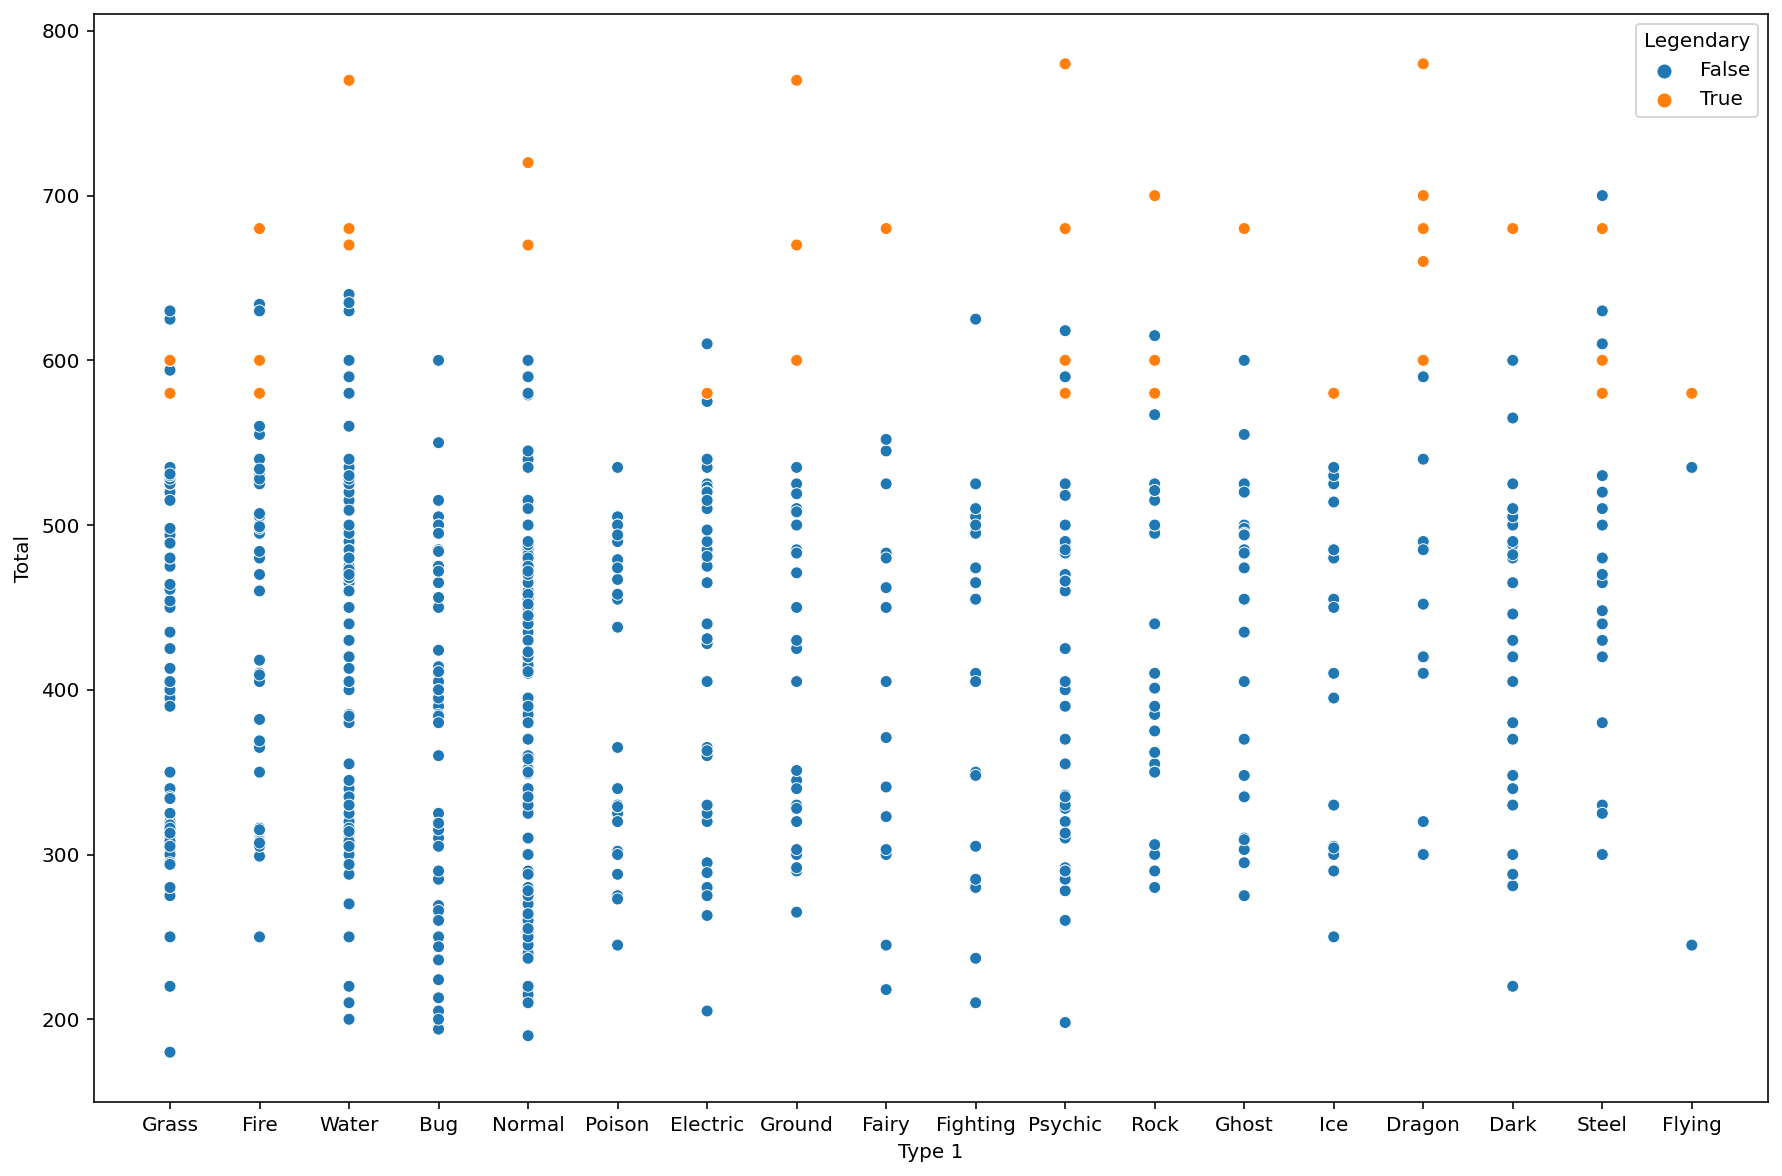

In [44]:
# Total값에 따른 분포 plot
# Toal 값과 Legendary 어떤 관계인지 확인

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

sns.scatterplot(data=pokemon, x="Type 1", y="Total", hue="Legendary")
plt.show()

In [45]:
## 전설의 포켓몬, 세부 스탯

In [46]:
# 세부스탯: HP, Attack, Defense, Sp. Atk, Sp. Def, Speed

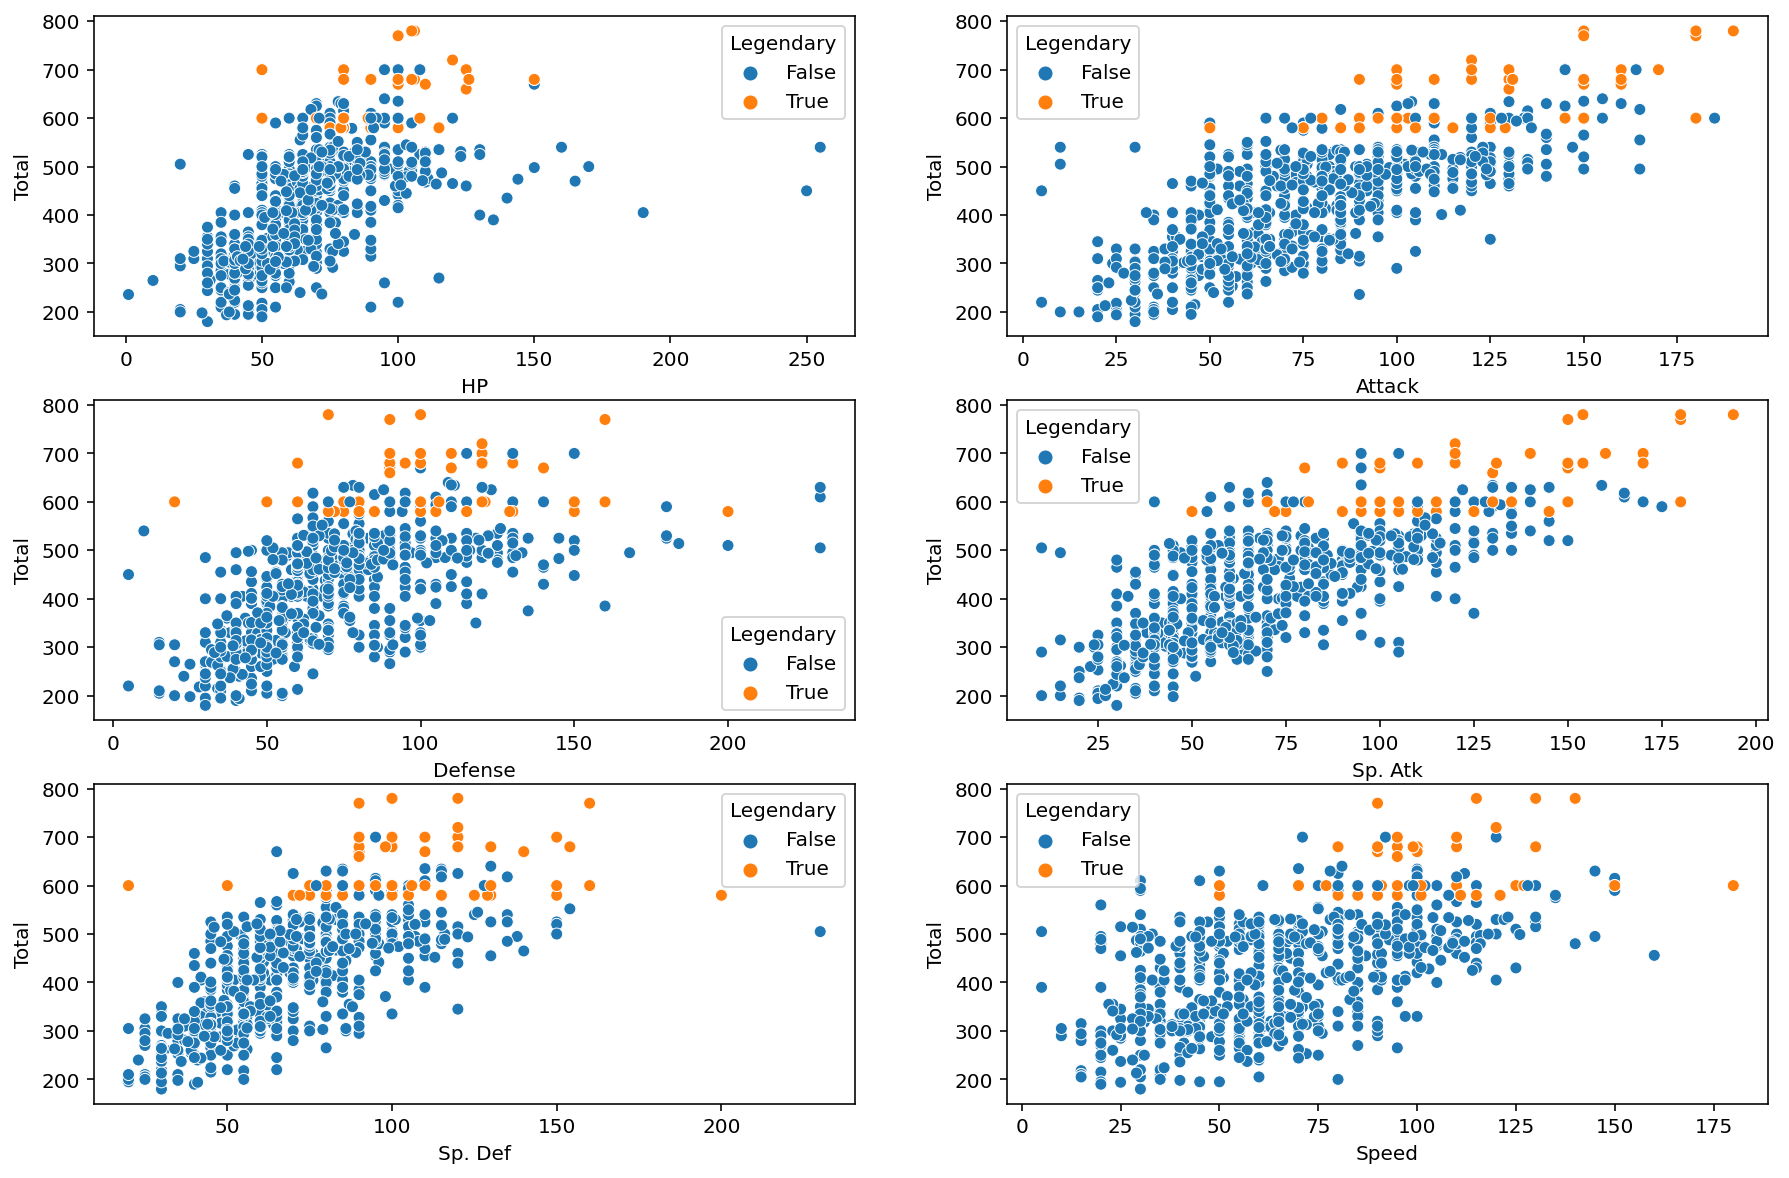

In [47]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(15, 10)  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

# "HP" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="HP", hue="Legendary", ax=ax1)

# "Attack" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Attack", hue="Legendary", ax=ax2)

# "Defense" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Defense", hue="Legendary", ax=ax3)

# "Sp. Atk" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Sp. Atk", hue="Legendary", ax=ax4)

# "Sp. Def" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Sp. Def", hue="Legendary", ax=ax5)

# "Speed" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Speed", hue="Legendary", ax=ax6)

plt.show()


In [48]:
## 1-10 전설의 포켓몬은?
# Generation : 포켓몬의 세대

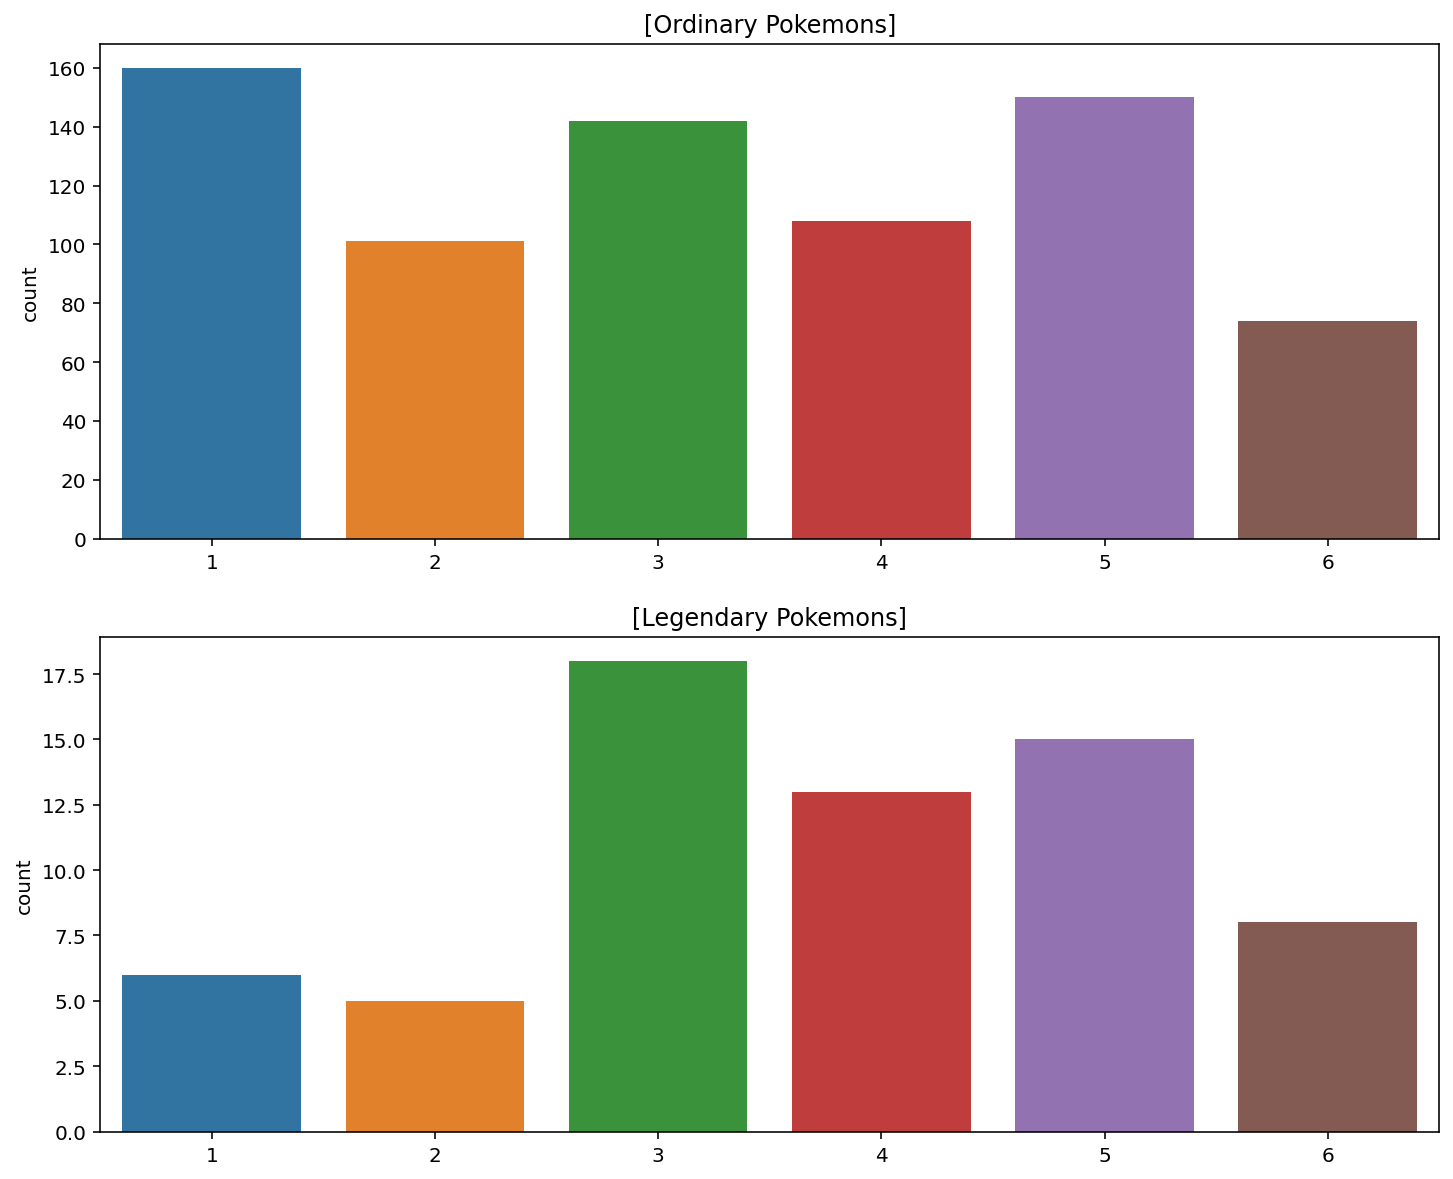

In [49]:
# 각 세대에 때한 포켓몬의 수를 확인

plt.figure(figsize=(12, 10))   # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=ordinary, x="Generation").set_xlabel('')
plt.title("[Ordinary Pokemons]")
plt.subplot(212)
sns.countplot(data=legendary, x="Generation").set_xlabel('')
plt.title("[Legendary Pokemons]")
plt.show()

In [50]:
## 전설의 포켓몬과 일반 포켓몬, 그 차이는? (1) Total값

In [51]:
# 목표는 전설의 포켓몬을 일반 포켓몬에서 분류하는 것, 각가의 특징들을 센분화 후 확인한다.
# legendary 포켓몬과 Ordinary 포켓몬을 분리해서 각각 분석한다

In [52]:
# 전설의 포켓몬의 Total 값
# Total 값을 속성(Type1)별로 확인한다.

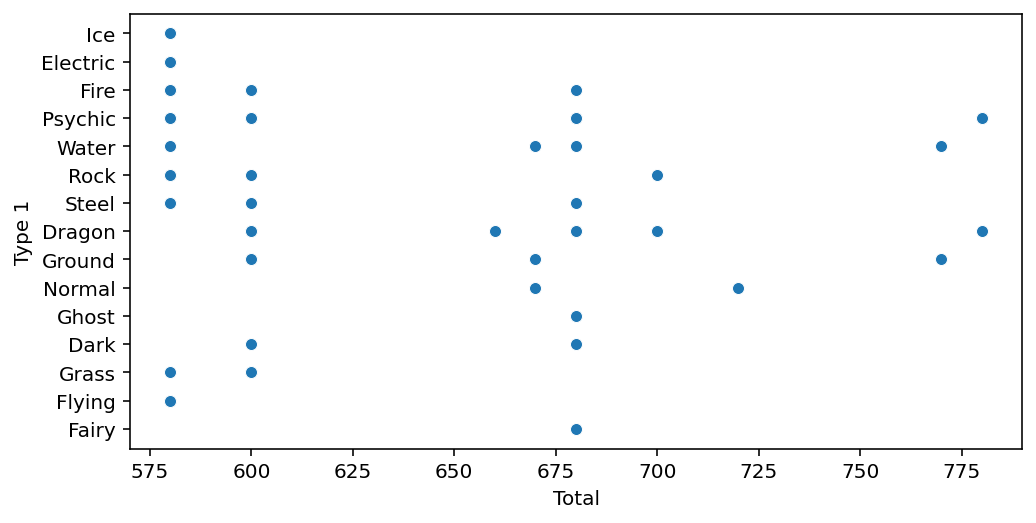

In [53]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.scatterplot(data=legendary, y="Type 1", x="Total")
plt.show()

In [54]:
# 전설의 포켓몬이 가지는 Total값들의 집합을 확인

print(sorted(list(set(legendary["Total"]))))

[580, 600, 660, 670, 680, 700, 720, 770, 780]


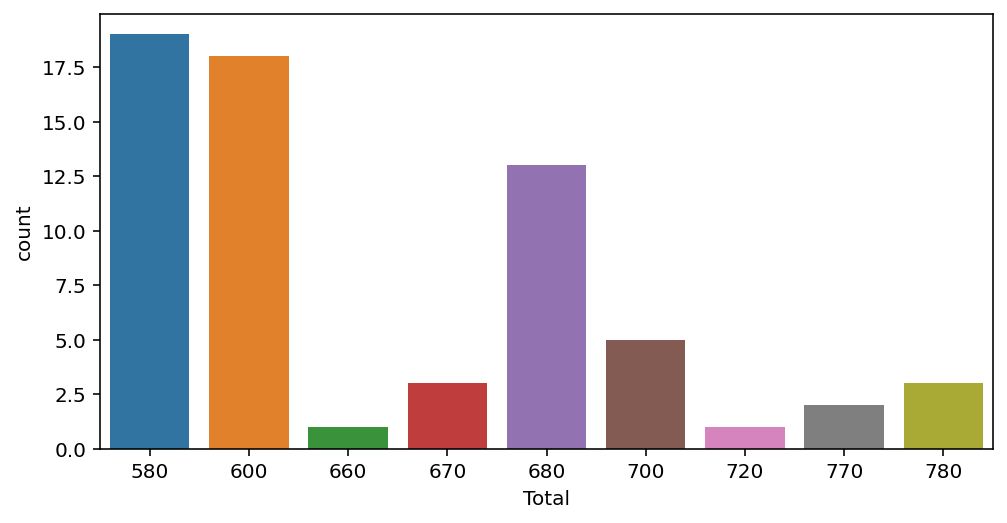

In [55]:
# 그래프로 전설의 포켓몬이 가지는 각 Total값에 대한 포켓몬 수를 확인

fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.countplot(data=legendary, x="Total")
plt.show()

In [56]:
# 총 65마리의 전설의 포켓몬이 9개의 Total값만 가진다는 것 = 약 7.22마리 끼리는 같은 Total 스탯 값을 가진다

round(65 / 9, 2)

7.22

In [57]:
# Ordinary 포켓몬의 'Total' 값 집합

print(sorted(list(set(ordinary["Total"]))))

[180, 190, 194, 195, 198, 200, 205, 210, 213, 215, 218, 220, 224, 236, 237, 240, 244, 245, 250, 251, 253, 255, 260, 262, 263, 264, 265, 266, 269, 270, 273, 275, 278, 280, 281, 285, 288, 289, 290, 292, 294, 295, 299, 300, 302, 303, 304, 305, 306, 307, 308, 309, 310, 313, 314, 315, 316, 318, 319, 320, 323, 325, 328, 329, 330, 334, 335, 336, 340, 341, 345, 348, 349, 350, 351, 352, 355, 358, 360, 362, 363, 365, 369, 370, 371, 375, 380, 382, 384, 385, 390, 395, 400, 401, 405, 409, 410, 411, 413, 414, 415, 418, 420, 423, 424, 425, 428, 430, 431, 435, 438, 440, 442, 445, 446, 448, 450, 452, 454, 455, 456, 458, 460, 461, 462, 464, 465, 466, 467, 468, 470, 471, 472, 473, 474, 475, 479, 480, 481, 482, 483, 484, 485, 487, 488, 489, 490, 494, 495, 497, 498, 499, 500, 505, 507, 508, 509, 510, 514, 515, 518, 519, 520, 521, 523, 525, 528, 530, 531, 534, 535, 540, 545, 550, 552, 555, 560, 565, 567, 575, 579, 580, 590, 594, 600, 610, 615, 618, 625, 630, 634, 635, 640, 670, 700]


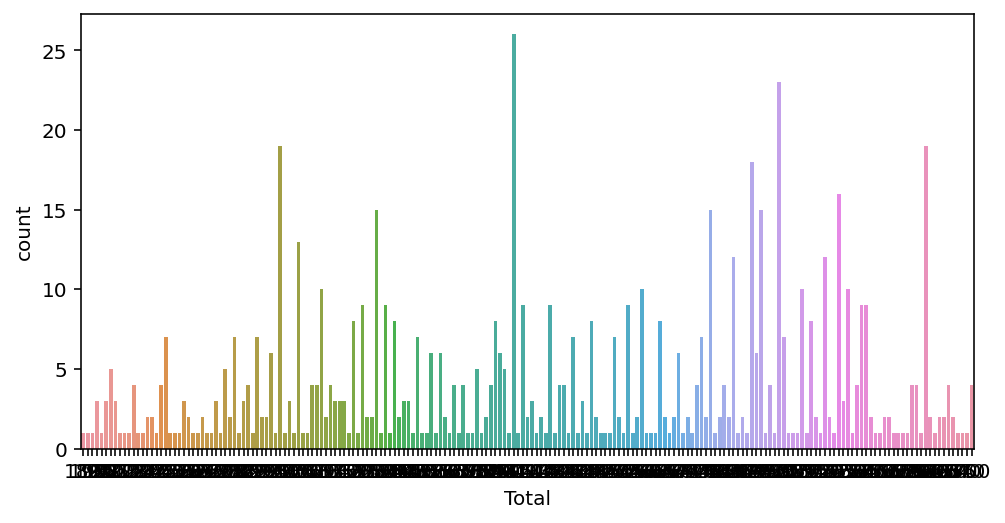

In [58]:
# Q. 이 집합의 크기(길이)를 확인

fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.countplot(data=ordinary, x="Total")
plt.show()

In [60]:
# 일반 포켓몬은 총 195가지의 Total 속성값을 가지고, 전체 일반 포켓몬은 (800 - 65), 즉 735마리이므로, 약 3.77마리만 같은 Total 스탯 값을 가진다.
round(735 / 195, 2)

3.77

In [ ]:
# 위의 분석으로 두 가지의 사항은 아래와 같음.

"""
1. 다양성 비교: Total 값의 다양성 측면에서, 일반 포켓몬의 Total 값이 전설의 포켓몬보다 두 배 가까이 많음.
                이는 전설의 포켓몬의 Total 값이 상대적으로 덜 다양하다는 것을 의미함.
                한 포켓몬의 Total 속성값이 전설의 포켓몬의 값들 집합에 포함되는지 여부는 전설의 포켓몬 여부를 결정하는 중요한 기준 중 하나임.

고유한 Total 값: 전설의 포켓몬의 Total 값 중에는 특이하게 일반 포켓몬이 가지지 못하는 값들이 존재함.
                 예를 들어, 680, 720, 770, 780과 같은 Total 값들은 전설의 포켓몬에게 특유한 특성을 나타낼 수 있음.
                 따라서 Total 값은 legendary 여부를 예측하는 데에 중요한 특성으로 간주됨.

이러한 사안을 통해서 Total 값은 legendary 여부를 판별하는 데에 중요한 역할을 할 것으로 판단됨. """


In [62]:
## 1-12 전설의 포켓몬과 일반 포켓몬, 그 차이는? (2) 이름

In [63]:
# 특정 단어가 들어가 있는 이름
n1, n2, n3, n4, n5 = legendary[3:6], legendary[14:24], legendary[25:29], legendary[46:50], legendary[52:57]
names = pd.concat([n1, n2, n3, n4, n5]).reset_index(drop=True)
names

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
1,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
2,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
3,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
4,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
5,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
6,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
7,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
8,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
9,383,Groudon,Ground,NaN,670,100,150,140,100,90,90,3,True


In [64]:
# 이름에 forme가 들어있는 포켓몬을 확인

formes = names[13:23]
formes

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
13,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True
14,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
15,386,DeoxysDefense Forme,Psychic,NaN,600,50,70,160,70,160,90,3,True
16,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True
17,641,TornadusIncarnate Forme,Flying,NaN,580,79,115,70,125,80,111,5,True
18,641,TornadusTherian Forme,Flying,NaN,580,79,100,80,110,90,121,5,True
19,642,ThundurusIncarnate Forme,Electric,Flying,580,79,115,70,125,80,111,5,True
20,642,ThundurusTherian Forme,Electric,Flying,580,79,105,70,145,80,101,5,True
21,645,LandorusIncarnate Forme,Ground,Flying,600,89,125,90,115,80,101,5,True
22,645,LandorusTherian Forme,Ground,Flying,600,89,145,90,105,80,91,5,True


In [65]:
# 데이터셋에 이름 길이 컴럼을 생성해서 비교한다.
#legendary와 ordinary 각각에 모두 "name_count"라는 이름의 길이를 나타내는 컬럼을 만들어준다.
# 파이썬 람다(lambda) 기능을 사용해 행마다 이름의 길이를 구하고, 이를 "name_count" 칼럼에 넣어준다.

legendary["name_count"] = legendary["Name"].apply(lambda i: len(i))    
legendary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True,8
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True,6
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True,7
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True,6
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,19


In [66]:
# Q. ordinary 포켓몬의 데이터에도 'name_count' 값을 추가한다.


ordinary["name_count"] = ordinary["Name"].apply(lambda i: len(i))    
ordinary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


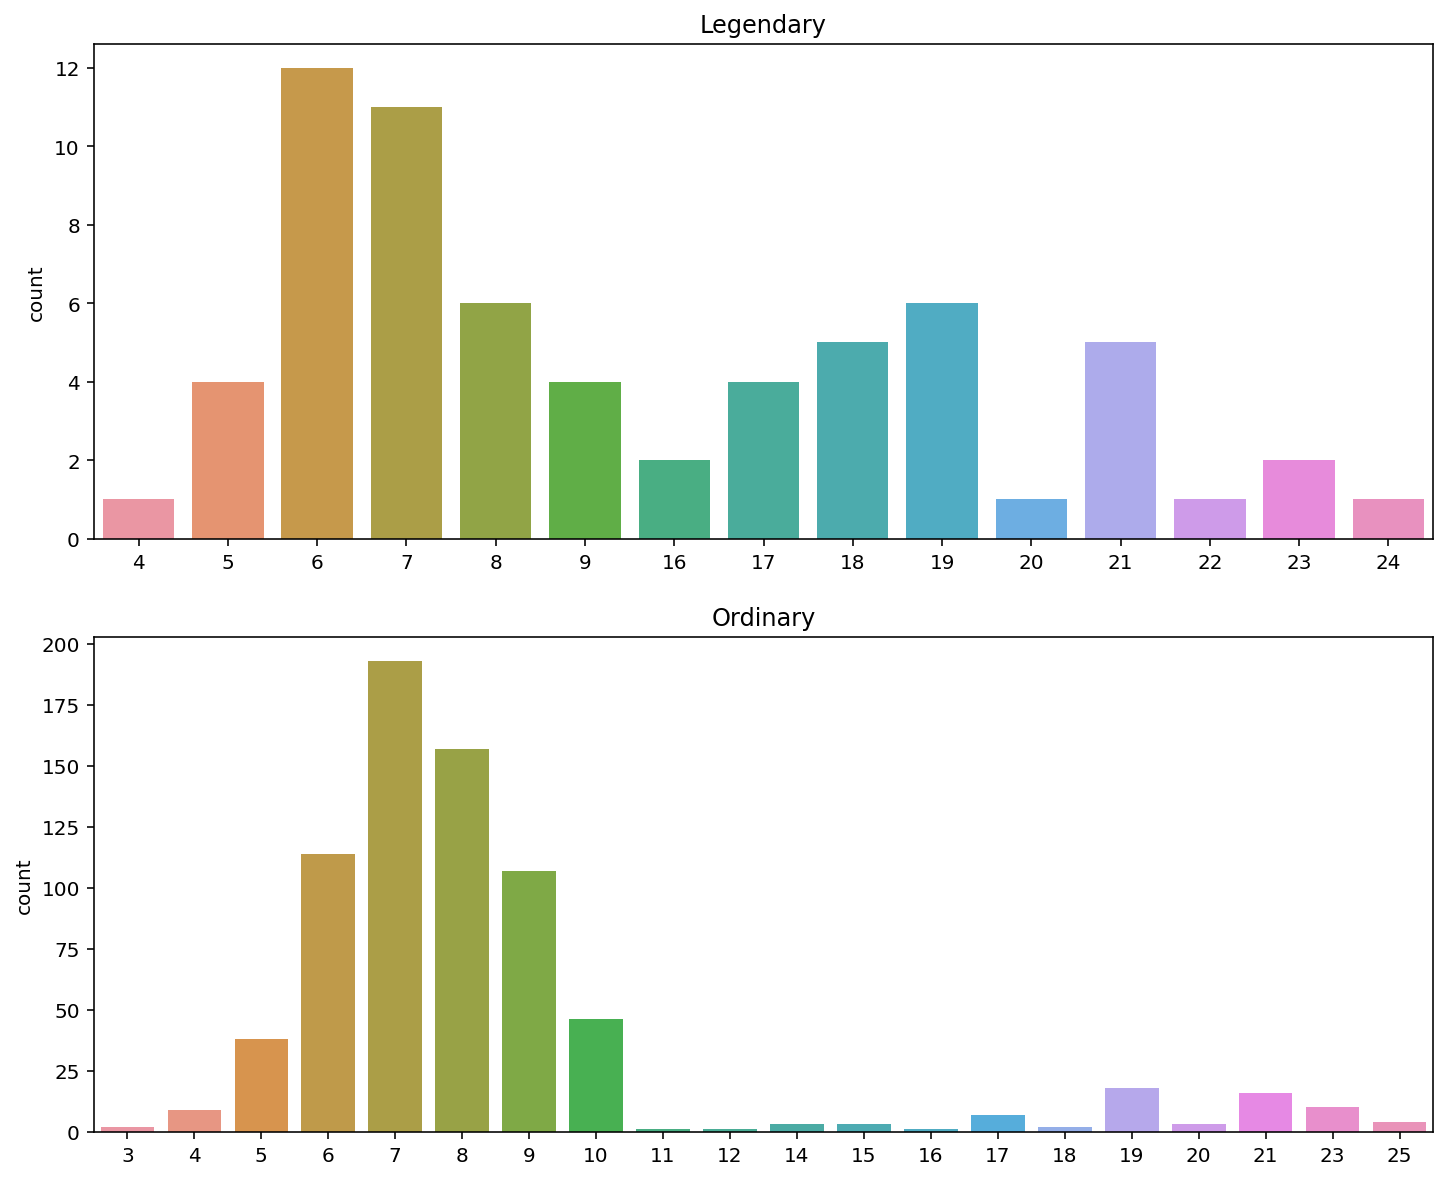

In [67]:
# name_count 컬럼은 어떤 특징을 갖게 되는지 그래프로 확인한다.

plt.figure(figsize=(12, 10))   # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=legendary, x="name_count").set_xlabel('')
plt.title("Legendary")
plt.subplot(212)
sns.countplot(data=ordinary, x="name_count").set_xlabel('')
plt.title("Ordinary")
plt.show()

In [ ]:
""" 위 그래프의 결과에서 전설의 포켓몬은 16 이상의 긴 이름을 가진 포켓몬이 많고, 
    일반 포켓몬은 10 이상의 길이를 가지는 이름의 빈도가 아주 낮음."""

In [68]:
# Q. 일반 포켓몬의 이름이 10글자 이상일 확률 계산

print(round(len(ordinary[ordinary["name_count"] > 9]) / len(ordinary) * 100, 2), "%")

15.65 %


In [ ]:
"""

전설의 포켓몬의 이름이 10 이상일 확률은 41% 를 넘는 반면에, 일반 포켓몬의 이름이 10 이상일 확률은 약 16% 밖에 안됨을 확인할 수 있음.
만약 "Latios"가 전설의 포켓몬이라면, "%%% Latios" 또한 전설의 포켓몬임.
적어도 전설의 포켓몬에서 높은 빈도를 보이는 이름들의 모임이 존재함.
전설의 포켓몬은 긴 이름을 가졌을 확률이 높음

"""

In [ ]:
### 1-13. 모델에 넣기 위해! 데이터 전처리하기, 이름의 길이가 10이상인가?
"""
데이터 분석을 통해 머신러닝을 수행하려면 모델에 입력할 수 있는 형태로 데이터를 변환해야 한다. 
특히, 문자열 데이터를 모델이 처리할 수 있는 숫자나 부울 형태로 전처리하는 과정이 필요하다.

EDA 결과를 기반으로 이름 컬럼을 처리하는데 중점으로 하겠음. 이름에 관한 두 가지 주요 처리 과정은 다음과 같다.

1. **이름의 길이 처리:** "name_count" 컬럼을 생성하여 이름의 길이가 10을 넘는지 여부에 따라 새로운 categorical 컬럼을 생성한다.

2. **토큰 추출 처리:** 전설의 포켓몬에서 많이 등장하는 토큰을 추출하고, 토큰의 포함 여부를 나타내는 원-핫 인코딩(One-Hot Encoding)을 수행한다.

이렇게 처리된 데이터는 모델 학습에 활용될 수 있도록 특징을 잘 나타내게 된다.
"""

In [69]:
# 이름의 길가 10 이산인가 아닌가 여부 확인

#이름의 길이를 확인할 수 있는 name_count 컬럼을 생성함.
#아까 생성한 방법과 같지만, 이번엔 전체 데이터가 있는 pokemon 데이터 프레임에 생성함.

pokemon["name_count"] = pokemon["Name"].apply(lambda i: len(i))
pokemon.head()


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


In [70]:
# 또한 이름의 길이가 10 이상이면 True, 미만이면 False를 가지는 long_name 컬럼을 생성한다.

pokemon["long_name"] = pokemon["name_count"] >= 10
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True


In [71]:
## 1-14. 모델에 넣기! 데이터 전처리하기 (2) 이름에 자주 쓰이는 토큰 추출

In [ ]:
"""
포켓몬의 이름에 대한 토큰 추출 작업을 시작하기 전에 몇 가지 유형을 확인한다.

1. 한 단어로 이루어진 이름 (예: Venusaur)
2. 두 단어로 이루어진 이름이지만, 앞 단어는 두 개의 대문자를 가지며 대문자를 기준으로 두 부분으로 나뉘는 경우 (예: VenusaurMega Venusaur)
3. 두 단어로 이루어진 이름이지만, 맨 뒤에 X 또는 Y로 성별을 표시하는 경우 (예: CharizardMega Charizard X)
4. 알파벳이 아닌 문자를 포함하는 경우 (예: Zygarde50% Forme)

특히,알파벳이 아닌 문자를 포함하는 경우를 처리할 때는 isalpha() 함수를 활용할 수 있다.
     주의할 점은 isalpha() 함수는 띄어쓰기가 있는 경우에도 False로 처리되기 때문에 띄어쓰기를 없애고 체크하는 절차가 필요하다.

"""

In [72]:
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,7,False,Diancie
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,19,True,DiancieMegaDiancie
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,19,True,HoopaHoopaConfined
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,18,True,HoopaHoopaUnbound
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True,9,False,Volcanion


In [73]:
# 모든 띄어쓰기가 없어진 것이 확인됨.
# 다음은 isalpha() 함수를 이용해 이름이 알파벳으로만 이루어졌는지 확인한다.

pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False,Bulbasaur,True
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False,Ivysaur,True
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False,Venusaur,True
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True,VenusaurMegaVenusaur,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True,Charmander,True


In [74]:
# name_isalpha 컬럼이 잘 생성된 것으로 보입니다. 그렇다면 알파벳이 아닌 다른 문자가 이름에 포함된 것은 어떤 것들이 있는지 확인한다.

print(pokemon[pokemon["name_isalpha"] == False].shape)
pokemon[pokemon["name_isalpha"] == False]

(9, 17)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran♀,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran♀,False
37,32,Nidoran♂,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran♂,False
90,83,Farfetch'd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetch'd,False
131,122,Mr. Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon2,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon2,False
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho-oh,False
487,439,Mime Jr.,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon-Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon-Z,False
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [75]:
#이름에 알파벳이 아닌 것을 포함하는 경우는 9마리뿐임.이름을 적당히 바꿔준다.

pokemon = pokemon.replace(to_replace="Nidoran♀", value="Nidoran X")
pokemon = pokemon.replace(to_replace="Nidoran♂", value="Nidoran Y")
pokemon = pokemon.replace(to_replace="Farfetch'd", value="Farfetchd")
pokemon = pokemon.replace(to_replace="Mr. Mime", value="Mr Mime")
pokemon = pokemon.replace(to_replace="Porygon2", value="Porygon Two")
pokemon = pokemon.replace(to_replace="Ho-oh", value="Ho Oh")
pokemon = pokemon.replace(to_replace="Mime Jr.", value="Mime Jr")
pokemon = pokemon.replace(to_replace="Porygon-Z", value="Porygon Z")
pokemon = pokemon.replace(to_replace="Zygarde50% Forme", value="Zygarde Forme")

pokemon.loc[[34, 37, 90, 131, 252, 270, 487, 525, 794]]


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran X,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran X,False
37,32,Nidoran Y,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran Y,False
90,83,Farfetchd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetchd,False
131,122,Mr Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon Two,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon Two,False
270,250,Ho Oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho Oh,False
487,439,Mime Jr,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon Z,False
794,718,Zygarde Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [77]:
# 다시 isalpha로 확인한다.

# Q. 바꿔준 'Name' 컬럼으로 'Name_nospace'를 만들고, 다시 isalpha()로 체크해봅시다.
# [[YOUR CODE]]
pokemon[pokemon["name_isalpha"] == False]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran X,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran X,False
37,32,Nidoran Y,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran Y,False
90,83,Farfetchd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetchd,False
131,122,Mr Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon Two,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon Two,False
270,250,Ho Oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho Oh,False
487,439,Mime Jr,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon Z,False
794,718,Zygarde Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [ ]:
"""
위와 같이 이름에 알파벳이 아닌 문자가 없는 것을 확인했음.이제 이름을 토큰화하여 특정 패턴에 따라 분리해야 한다.

토큰화는 주로 정규표현식(RegEx: Regular Expression)을 사용하여 문자열을 처리하는 방법 중 하나이다.
정규표현식은 특정한 패턴을 정의하여 문자열을 검색하거나 변경하는 데 사용됩니다. 
파이썬에서는 `re` 패키지를 통해 정규표현식을 사용할 수 있다. 

"""

In [78]:
import re

In [79]:
# 이름을 예제로 한 단계씩 천천히 분해한다.

name = "CharizardMega Charizard X"

In [80]:
# 이름을 공백을 기준으로 쪼갠다.

name_split = name.split(" ")
name_split

['CharizardMega', 'Charizard', 'X']

In [81]:
# 한 가지 더 필요한 것은 처음 요소인 CharizardMega 를 Charizard와 Mega로 나누는 것이다.
# 대문자를 기준으로 분리한다.

#name_split 리스트 안에 있는 첫 번째 요소를 쪼개고 싶으므로 temp에 저장한다.

temp = name_split[0]
temp

'CharizardMega'

In [82]:
# 위의  붙어있는 이름을 우리는 대문자로 시작해서 소문자로 끝나는 토큰들로 분리한다.
# 대문자로 시작해서 소문자로 끝나는 패턴을 찾는다.

tokens = re.findall('[A-Z][a-z]*', temp)
tokens

['Charizard', 'Mega']

In [ ]:
"""
여기서 [A-Z][a-z]* 라는 이상한 패턴이 쓰였는데 이것이 바로 정규표현식이다.

[A-Z] : A부터 Z까지의 대문자 중 한 가지로 시작하고,
[a-z] : 그 뒤에 a부터 z까지의 소문자 중 한 가지가 붙는데,
* : 그 소문자의 개수는 하나 이상인 패턴 (*는 정규표현식 중에서 "반복"을 나타내는 기호)
따라서 첫 글자가 대문자인 단어들을 분리하는 데에 효과적인 것임.

지금까지 한 과정을 반복문으로 합치면 한 개의 이름을 이루고 있는 모든 토큰을 tokens에 모아둘 수 있다.

"""

In [83]:
tokens = []
for part_name in name_split:
    a = re.findall('[A-Z][a-z]*', part_name)
    tokens.extend(a)
tokens

['Charizard', 'Mega', 'Charizard', 'X']

In [84]:
# 위 코드는 한 개의 이름을 토큰화할 수 있는 코드임.
# 이제 지금까지 진행한 토큰화 과정을 모든 이름에 적용시킬 수 있도록 함수를 만들어서 전체 데이터셋에 적용한다.

# Q. 다음 코드의 빈칸을 채워주세요.
def tokenize(name):
    # [[YOUR CODE]]
        
    return np.array(tokens)

In [85]:
# 위 함수를 이용해서 간단한 코드로 이름을 토큰화한다.

name = "CharizardMega Charizard X"
tokenize(name)

array(['Charizard', 'Mega', 'Charizard', 'X'], dtype='<U9')

In [86]:
# tokenize(name)라는 간단한 코드로 이름을 모두 토큰화할 수 있다.
# 이를 위해 전설의 포켓몬 데이터셋에 적용시켜서, 전설의 포켓몬의 이름에 사용된 토큰을 모아본다.

all_tokens = list(legendary["Name"].apply(tokenize).values)

token_set = []
for token in all_tokens:
    token_set.extend(token)

print(len(set(token_set)))
print(token_set)

3
['Charizard', 'Mega', 'Charizard', 'X', 'Charizard', 'Mega', 'Charizard', 'X', 'Charizard', 'Mega', 'Charizard', 'X', 'Charizard', 'Mega', 'Charizard', 'X', 'Charizard', 'Mega', 'Charizard', 'X', 'Charizard', 'Mega', 'Charizard', 'X', 'Charizard', 'Mega', 'Charizard', 'X', 'Charizard', 'Mega', 'Charizard', 'X', 'Charizard', 'Mega', 'Charizard', 'X', 'Charizard', 'Mega', 'Charizard', 'X', 'Charizard', 'Mega', 'Charizard', 'X', 'Charizard', 'Mega', 'Charizard', 'X', 'Charizard', 'Mega', 'Charizard', 'X', 'Charizard', 'Mega', 'Charizard', 'X', 'Charizard', 'Mega', 'Charizard', 'X', 'Charizard', 'Mega', 'Charizard', 'X', 'Charizard', 'Mega', 'Charizard', 'X', 'Charizard', 'Mega', 'Charizard', 'X', 'Charizard', 'Mega', 'Charizard', 'X', 'Charizard', 'Mega', 'Charizard', 'X', 'Charizard', 'Mega', 'Charizard', 'X', 'Charizard', 'Mega', 'Charizard', 'X', 'Charizard', 'Mega', 'Charizard', 'X', 'Charizard', 'Mega', 'Charizard', 'X', 'Charizard', 'Mega', 'Charizard', 'X', 'Charizard', 'Mega', '

In [ ]:
"""
중복된 것을 제외하면 총 65개의 토큰이 존재한다.여기서 많이 사용된 토큰을 추출해 보기로 한다.
이 중 우리는 토큰이 사용된 개수를 알고 싶기 때문에 Counter 객체를 사용할 것임.
"""

In [88]:
# collections 모듈에 있는 Counter를 가져온다.

from collections import Counter

In [89]:
# Counter 객체는 다음과 같이 각 요소가 몇 개인지를 담은 튜플 리스트를 반환한다.

a = [1, 1, 0, 0, 0, 1, 1, 2, 3]
Counter(a)

Counter({1: 4, 0: 3, 2: 1, 3: 1})

In [90]:
# most_common을 활용하면 가장 많은 요소와 등장 횟수가 무엇인지를 정렬해 준다.

Counter(a).most_common()

[(1, 4), (0, 3), (2, 1), (3, 1)]

In [91]:
# 이것을 활용하여 oken_set에는 어떤 토큰이 가장 많이 쓰였는지 찾아본다.
# most_common() 함수에 인자로 숫자를 넣어주면 원하는 개수만큼만 출력할 수 있다.
# 예시로 10개만 추려본다.


most_common = Counter(token_set).most_common(10)
most_common

[('Charizard', 130), ('Mega', 65), ('X', 65)]

In [92]:
# 전설의 포켓몬 이름에 등장하는 토큰이 포켓몬의 이름에 있는지의 여부를 나타내는 컬럼을 만든다.
# Pandas에서 문자열 데이터셋에 특정 구문이 포함되어 있는지 여부를 str.contains 함수로 간단히 확인한다.

for token, _ in most_common:
    # pokemon[token] = ... 형식으로 사용하면 뒤에서 warning이 발생합니다
    pokemon[f"{token}"] = pokemon["Name"].str.contains(token)

pokemon.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha,Charizard,Mega,X
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False,Bulbasaur,True,False,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False,Ivysaur,True,False,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False,Venusaur,True,False,False,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True,VenusaurMegaVenusaur,True,False,True,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True,Charmander,True,False,False,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,10,True,Charmeleon,True,False,False,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,9,False,Charizard,True,True,False,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False,25,True,CharizardMegaCharizardX,True,True,True,True
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False,25,True,CharizardMegaCharizardY,True,True,True,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False,8,False,Squirtle,True,False,False,False


In [ ]:
"""

이름에 대한 전처리를 통해 이름의 길이와 특정 토큰 여부를 나타내는 부울 데이터를 생성했음.
이름의 길이가 10을 넘는지 여부를 나타내는 "long_name" 컬럼과, Forme 등의 특정 토큰 여부를 나타내는 컬럼들이 True 또는 False로 표시됨.
이렇게 문자열 데이터를 적절한 형태로 변환하여 모델에 입력할 수 있게 됨.
이와 같이 적절한 방법을 통해서 문자열 데이터를 숫자나 부울 데이터로 변환해서 정보를 넣어주면 모델의 성능을 올리는 데에 도움을 줄 수 있음.

"""

In [93]:
## 1-15. 모델에 넣기 위해! 데이터 전처리하기 (3) Type1 & 2! 범주형 데이터 전처리하기

In [94]:
# EDA 단계에서 만들었던 모든 Type의 리스트를 다시 가져오기

print(types)


['Ice', 'Poison', 'Normal', 'Ghost', 'Rock', 'Steel', 'Bug', 'Ground', 'Psychic', 'Electric', 'Fire', 'Water', 'Flying', 'Dark', 'Grass', 'Fighting', 'Dragon', 'Fairy']


In [95]:
# 위 18개의 컬럼에 대해 원-핫 인코딩을 해주는 작업은 다음과 같이 한다.

for t in types:
    pokemon[t] = (pokemon["Type 1"] == t) | (pokemon["Type 2"] == t)
    
pokemon[[["Type 1", "Type 2"] + types][0]].head()

,Type 1,Type 2,Ice,Poison,Normal,Ghost,Rock,Steel,Bug,Ground,Psychic,Electric,Fire,Water,Flying,Dark,Grass,Fighting,Dragon,Fairy
0,Grass,Poison,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,Grass,Poison,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,Grass,Poison,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,Grass,Poison,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,Fire,NaN,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [96]:
# 0번 포켓몬의 경우 첫 번째 속성이 풀(Grass), 두 번째 속성이 독(Poison)이므로, 그 컬럼에만 True값을 가지는 것을 위와 같이 확인할 수 있다.

In [97]:
## 1-16. 가랏, 몬스터볼! (1) 가장 기본 데이터로 만드는 베이스라인

In [ ]:
# original_data (원본 데이터 불러오기)

In [98]:
print(original_data.shape)
original_data.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [99]:
# 데이터로 베이스라인 모델에 넣어야 한다. 그러기 위해선 문자열 데이터는 빼주어야 한다.
# 컬럼을 다시 확인한다.

original_data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [100]:
# 다음 컬럼 중 의미 없는 컬럼인 #와 문자열 데이터인 Name, Type 1, Type 2 데이터는 제외한다.
# target 데이터인 Legendary 도 제외한다.

features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']

In [101]:
# target 데이터인 Legendary 또한 변수에 저장한다.

target = 'Legendary'

In [102]:
# 이제 모델에 바로 넣어줄 수 있도록 X 변수에 features 컬럼에 해당하는 데이터를 담는다.

In [103]:
# Q. 'original_data'에서 'features' 컬럼에 해당하는 데이터를 변수 'X'에 저장한다.

X = original_data[features]
print(X.shape)
X.head()

(800, 8)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
4,309,39,52,43,60,50,65,1


In [104]:
# Q. 'target' 컬럼의 데이터를 변수 'y'에 저장합니다.

y = original_data[target]
print(y.shape)
y.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

In [ ]:
"""
데이터 준비에서 마지막으로 해야 할 일은
훈련 데이터와 학습 데이터로 분리하는 것이다.
모델을 학습시킨 후 그 성능을 평가하기 위해서는 학습 데이터와 테스트 데이터가 분리되어 있어야 한다.

데이터 분리에는 sklearn.model_selection 모듈 안의 train_test_split 함수를 사용한다.
"""

In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 8) (640,)
(160, 8) (160,)


In [106]:
## 1-17. 몬스터볼! (2) 의사 결정 트리 모델 학습시키기

In [107]:
# 분류 모델로 가볍게 의사 결정 트리(decision tree) 를 사용한다.
# 의사 결정 트리 모델은 sklearn 패키지의 DecisionTreeClassifier 모듈로 불러올 수 있다.

from sklearn.tree import DecisionTreeClassifier
print('슝=3')

슝=3


In [108]:
# 모델을 정의, random_statte는 모델의 랜덤성을 제어한다.

model = DecisionTreeClassifier(random_state=25)
model

DecisionTreeClassifier(random_state=25)

In [109]:
# 모델을 훈련 데이터로 학습시키고 학습 데이터를 예측해 본다.

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('슝=3')

슝=3


In [ ]:
"""
모델을 X_train, y_train 두 데이터로 학습시키고 X_test 데이터를 넣어서 예측한 y_pred 값까지 만들어냄.
다음으로 모델이 X_test를 입력받고 예측한 y_pred 값이 실제 정답인 y_test와 얼마나 비슷한지 채점한다.
먼저 sklearn.metrics의 confusion_matrix로 결과를 확인한다.
"""

In [111]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[144,   3],
       [  5,   8]])

In [112]:
# 정확도 외에 다른 척도로 모델의 성능을 평가해보기
# classification_report를 활용해서 다른 값들을 확인한다.

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      0.98      0.97       147
        True       0.73      0.62      0.67        13

    accuracy                           0.95       160
   macro avg       0.85      0.80      0.82       160
weighted avg       0.95      0.95      0.95       160



In [ ]:
"""
전체적인 결과를 종합해보면, Recall 값이 0.62로 상대적으로 낮게 나왔다.

Recall 값이 낮다는 것은 전체 전설의 포켓몬 중 일부만을 정확히 분류할 수 있다는 의미이며, 
불균형한 데이터에서는 Positive(전설의 포켓몬)를 잘 잡아내는 것이 중요하다.
현재의 결과에서는 전설의 포켓몬을 일반 포켓몬으로 잘못 판단하는 경우가 많은 편이다.

따라서 머신러닝 모델의 성능 향상을 위해 추가적인 조치가 필요할 것으로 보인다.
"""

In [113]:
1-18. (3) 피쳐 엔지니어링 데이터로 학습시키면 얼마나 차이가 나는가?

Object `나는가` not found.


In [ ]:
1-18. (3) 피쳐 엔지니어링 데이터로 학습시키면 얼마나 차이가 나는가

In [114]:
"""
전처리를 하지 않은 데이터만으로 학습 및 평가를 했다.
하지만 지금까지 한 다양한 특성들을 새로 만들어주거나 전처리하는 등 피처 엔지니어링(Feature Engineering)를 진행했다.
그러면 그 데이터들을 모두 활용하면 어떻게 될까? 차이가 나지 않을까?
만들어내 데이터도 추가해서 테스트를 하고 비교를 해 볼 필요성이 있다.

일단 처리했던 모든 컬럼을 한 번 확인해 보는 것부터 시작한다.

"""

'\n전처리를 하지 않은 데이터만으로 학습 및 평가를 했다.\n하지만 지금까지 한 다양한 특성들을 새로 만들어주거나 전처리하는 등 피처 엔지니어링(Feature Engineering)를 진행했다.\n그러면 그 데이터들을 모두 활용하면 어떻게 될까? 차이가 나지 않을까?\n만들어내 데이터도 추가해서 테스트를 하고 비교를 해 볼 필요성이 있다.\n\n일단 처리했던 모든 컬럼을 한 번 확인해 보는 것부터 시작한다.\n\n'

In [115]:
print(len(pokemon.columns))
print(pokemon.columns)

38
Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary', 'name_count',
       'long_name', 'Name_nospace', 'name_isalpha', 'Charizard', 'Mega', 'X',
       'Ice', 'Poison', 'Normal', 'Ghost', 'Rock', 'Steel', 'Bug', 'Ground',
       'Psychic', 'Electric', 'Fire', 'Water', 'Flying', 'Dark', 'Grass',
       'Fighting', 'Dragon', 'Fairy'],
      dtype='object')


In [116]:
# 원래 13개밖에 안 되었던 컬럼이 우리의 전처리를 통해 45개로 늘어났습니다.
# 그렇다면 이 중 모델에 넣어 분류하기 위해 제외해야 할 컬럼들은 무엇인지 고민해야 한다,

In [117]:
# 몇 가지 컬럼을 제외하고 모델 학습에 사용할 컬럼들만 추려서 features라는 변수에 저장한다.
# 이 features는 모델을 학습시키면서 입력값으로 사용될 특징들을 포함한다.

features = ['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 
            'name_count','long_name', 'Forme', 'Mega', 'Mewtwo','Deoxys', 'Kyurem', 'Latias', 'Latios',
            'Kyogre', 'Groudon', 'Hoopa','Poison', 'Ground', 'Flying', 'Normal', 'Water', 'Fire',
            'Electric','Rock', 'Dark', 'Fairy', 'Steel', 'Ghost', 'Psychic', 'Ice', 'Bug', 'Grass', 'Dragon', 'Fighting']

len(features)

38

In [119]:
# 총 7개를 제외하니 38개의 컬럼만이 남는다.
#그러면 모델이 맞혀야 할, 정답 데이터도 준비해야 한다.
# 전설의 포켓몬인지 아닌지의 여부를 나타내는 Legendary를 target 변수에 저장한다.

target = "Legendary"
target

'Legendary'

In [121]:
# 이제 모델에 입력해 줄 진짜 데이터를 X 변수에 저장한다.
# 이와같이 저장해두면 앞으로 간편하게 모델에 입력할 데이터를 다룰 수 있다.

# Q. 사용할 feature에 해당하는 데이터를 'X' 변수에 저장합니다.
# [[YOUR CODE]]
print(X.shape)
X.head()

(800, 8)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
4,309,39,52,43,60,50,65,1


In [122]:
# 위와 같이 숫자 또느 부울 데이터로만 구성이 되어 출력이 되었다.
# 모델은 위의 데이터에서 각 숫자 또는 부울 데이터로부터 전설의 포켓몬 또는 일반 포켓몬의 특징(패턴)을 배우며 분류할 수 있도록 학습될 것이다.
# 모델 학습을 위해 필요한 정답 데이터인 target 변수를 활용하여 모델에 예측하고자 하는 대상을 설정해 주었다.
# 이제 이를 기반으로 모델을 학습시켜 전설의 포켓몬을 판별하는 분류 모델을 만들어 본다.


In [123]:
# Legendary 컬럼의 이름을 저장해 두었던 target 변수를 활용해 간단히 만들어 줄 수 있다.

# Q. 정답 데이터 'y'도 'target' 변수를 이용해 만들어준다.

y = original_data[target]
print(y.shape)
y.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

In [124]:
# 이번에도 X_train 부터 y_test까지로 분리해 주도록 한다.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 8) (640,)
(160, 8) (160,)


In [126]:
## 1-19.(4) 의사 결정 트리 모델 다시 학습시키기

In [127]:
# 의사 결정 트리를 활용해서 학습시킨 후 결과를 비교한다.

model = DecisionTreeClassifier(random_state=25)
model

DecisionTreeClassifier(random_state=25)

In [128]:
# Q. train 데이터로 decision tree 모델을 학습시키고
# test 데이터로 모델의 예측 값을 얻어봅시다!

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree 모델 학습
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Test 데이터로 예측
y_pred = model.predict(X_test)

# 정확도 출력
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.94375


In [129]:
# Q. confusion matrix를 확인해보세요.
# [[YOUR CODE]]
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[143   7]
 [  2   8]]


In [130]:
# Q. classification report도 확인해봅시다!

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.99      0.95      0.97       150
        True       0.53      0.80      0.64        10

    accuracy                           0.94       160
   macro avg       0.76      0.88      0.80       160
weighted avg       0.96      0.94      0.95       160



In [ ]:
"""

이전에는 recall 값이 약 0.62로 낮았지만, 새로운 피처 엔지니어링을 통해 recall 값이 0.92로 상당히 향상되었음.
이것은 추가한 다양한 정보와 전처리 작업이 모델의 성능을 높이는 데에 효과적이었다는 것을 나타낸다.

"""

In [ ]:
## 조필선 회고록 
## 2023-10-13 on Fri

"""

오늘 노드 시작해서 지금 완료하기까지 쉽지 않았지만 그래도 Node를 따라가고 학습하는 자체만으로도 스스로 머신러닝에
대해서 많은 것을 알게되는 것 같아서 좋았었던 것 같다.
아래과 같이 3가지 범주로 회고를 해본다.

1. 데이터 전처리와 탐색분석 
    - 데이터를 처음 받았을 때, 중복 여부를 확인하고 불필요한 정보를 제거하는 등의 세밀한 전처리 과정을 통해 초기 데이터셋을 
      정리했다. 또한, Seaborn을 사용하여 다양한 그래프로 데이터의 분포를 시각화함으로써 탐색적 데이터 분석(EDA)를 수행했다.

2. 새로운 특성 생성 및 피처 엔지니어링
    - 전체 데이터셋에서 일반 포켓몬과 전설 포켓몬을 분류하는 모델을 학습시키기 위해 새로운 특성을 생성하고, 기존의 데이터를 
      적절한 숫자나 부울 데이터로 변환하는 등의 피처 엔지니어링을 수행했다.
      이를 통해서 모델에 더 많은 정보를 제공하여 성능을 향상시킬 수 있었다.

3. 머신러닝 모델 학습과 평가
    - 생성된 특성과 전처리된 데이터를 사용하여 의사결정트리 모델을 학습하고, 해당 모델을 평가하는 과정을 진행하였다.
      초기의 모델 평가 결과에서는 recall 값이 낮아 개선이 필요했는데, 추가적인 특성 생성과 피처 엔지니어링을 통해서 recall을
      향상시켰다. 최종 모델은 정확도가 94로 나타났으며, 특히 전설 포켓몬을 잘 분류하는 데 성공한 것 같다.
      
      
이번 머신러닝 프로젝트를 통해서 데이터 분석 및 머신러닝에 대한 이해를 높일 수 있었고, 앞으로의 학습 노드 프로젝트에서도
더 나은 성과를 이루기 위해서 계속 노력하겠다.

"""
    
    